In [1]:
#importing the dependencies

In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data

In [4]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]

9

In [9]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Goat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

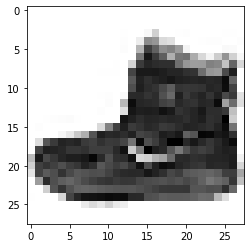

In [10]:
plt.imshow(X_train[0], cmap = 'Greys')

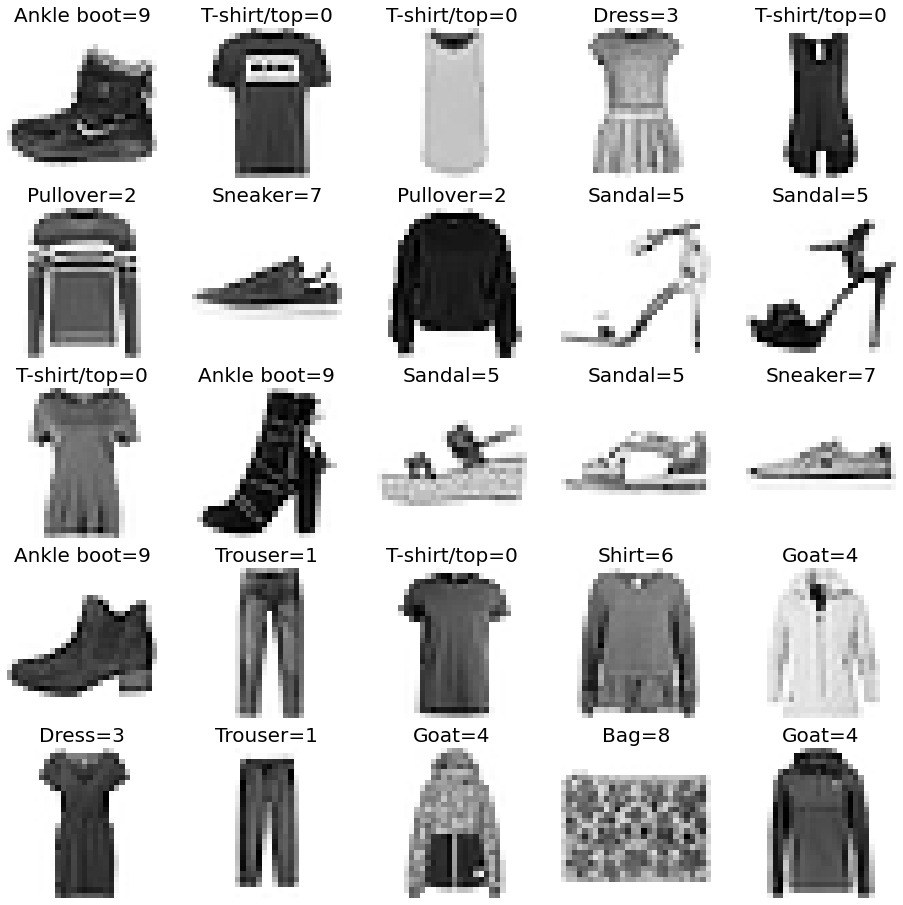

In [11]:
plt.figure(figsize = (16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap="Greys")
    plt.axis('off')
    plt.title(class_labels[y_train[i]] + "=" + str(y_train[i]), fontsize=20)

In [12]:
#feature scaling

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
#build neural network

In [15]:
model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[28,28]),
            keras.layers.Dense(units=32,activation='relu'),
            keras.layers.Dense(units=16,activation='relu'),
            keras.layers.Dense(units=10, activation='softmax')
])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [18]:
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5688 - accuracy: 0.8003
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4089 - accuracy: 0.8550
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3736 - accuracy: 0.8657
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3504 - accuracy: 0.8732
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3335 - accuracy: 0.8788
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3231 - accuracy: 0.8827
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.8855
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3052 - accuracy: 0.8877
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.8917
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.289

In [19]:
#test and evaluate neural network model

In [20]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3816 - accuracy: 0.8627


[0.38160738348960876, 0.8626999855041504]

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred[0]

array([1.78583854e-04, 5.97214807e-07, 1.04494284e-04, 3.04813881e-08,
       1.41991040e-05, 1.64536026e-03, 2.77356157e-05, 1.24781476e-02,
       3.91667127e-05, 9.85511720e-01], dtype=float32)

In [23]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
      dtype=float32)

In [24]:
np.argmax(y_pred[0].round(2))

9

In [25]:
y_test[0]

9

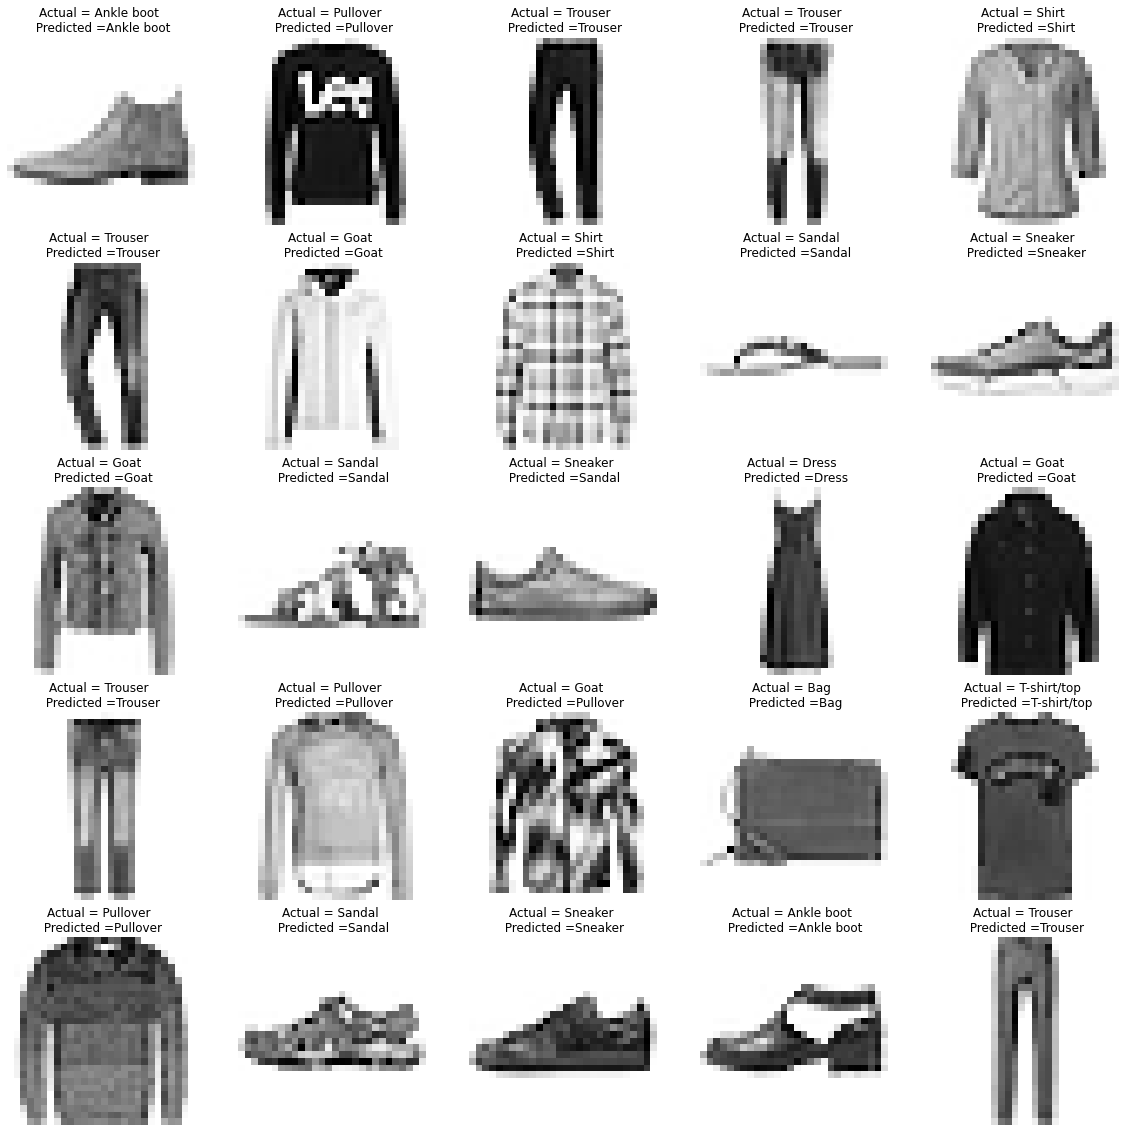

In [26]:
plt.figure(figsize = (20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i], cmap="Greys")
    plt.axis('off')
    plt.title("Actual = {} \n Predicted ={}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [np.argmax(i) for i in y_pred])

<AxesSubplot:>

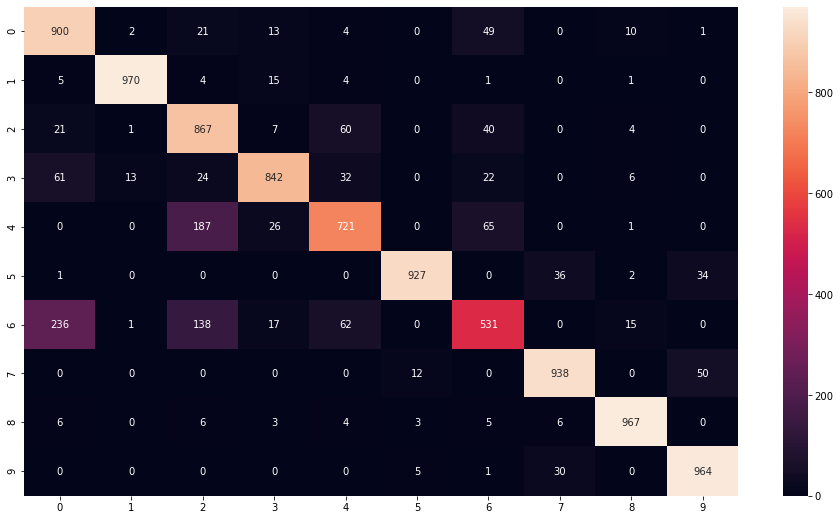

In [28]:
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True,fmt="d")

In [29]:
#classification report

In [30]:
from sklearn.metrics import classification_report
clf = classification_report(y_test, [np.argmax(i) for i in y_pred],target_names=class_labels,)

In [31]:
print(clf)

              precision    recall  f1-score   support

 T-shirt/top       0.73      0.90      0.81      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.70      0.87      0.77      1000
       Dress       0.91      0.84      0.88      1000
        Goat       0.81      0.72      0.76      1000
      Sandal       0.98      0.93      0.95      1000
       Shirt       0.74      0.53      0.62      1000
     Sneaker       0.93      0.94      0.93      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

